In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('Telco_customer_churn.csv')

pd.set_option('display.max_columns', None)
df.head()


,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [2]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_customer_data(data):
    """
    This function takes raw customer data, processes it by:
    1. Dropping irrelevant columns
    2. Handling missing values
    3. Encoding categorical columns
    4. Normalizing numerical columns
    """

 
    df = pd.DataFrame(data)

   
    drop_columns = ["Count","CustomerID", "Lat_Long", "Churn_Reason", "Churn_Label", "City","Churn_Value"]  
    df.drop(columns=drop_columns, inplace=True, errors='ignore')

   
    df["Total_Charges"] = pd.to_numeric(df["Total_Charges"], errors='coerce')
    df["Total_Charges"].fillna(df["Total_Charges"].median(), inplace=True)  

    
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    
    target_col = "Churn_Value"
    categorical_cols.remove("Churn_Label") if "Churn_Label" in categorical_cols else None
    categorical_cols.remove(target_col) if target_col in categorical_cols else None

    
    binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
    label_encoders = {}
    for col in binary_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    
    one_hot_cols = list(set(categorical_cols) - set(binary_cols))
    df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

   
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    
    return df


data = pd.read_csv('Telco_customer_churn.csv')
preprocessed_df = preprocess_customer_data(data)
preprocessed_df.head()


,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn_Score,CLTV,Streaming_Movies_No internet service,Streaming_Movies_Yes,Device_Protection_No internet service,Device_Protection_Yes,Internet_Service_Fiber optic,Internet_Service_No,Tech_Support_No internet service,Tech_Support_Yes,Online_Security_No internet service,Online_Security_Yes,Contract_One year,Contract_Two year,Streaming_TV_No internet service,Streaming_TV_Yes,Multiple_Lines_No phone service,Multiple_Lines_Yes,Online_Backup_No internet service,Online_Backup_Yes,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,-1.886175,-0.944111,0.707268,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1.268402,-0.981675,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
1,-1.885103,-0.905362,0.691215,0,0,0,1,-1.236724,1,1,0.197365,-0.940470,0.385650,-1.436462,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,-1.884567,-0.909951,0.697457,0,0,0,1,-0.992402,1,1,1.159546,-0.645186,1.268402,0.821409,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
3,-1.882423,-0.904204,0.687374,0,0,1,1,-0.177995,1,1,1.330711,0.337349,1.175481,0.509483,False,True,False,True,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False
4,-1.879743,-0.913530,0.710276,1,0,0,1,0.677133,1,1,1.294151,1.216004,1.407784,0.794358,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False


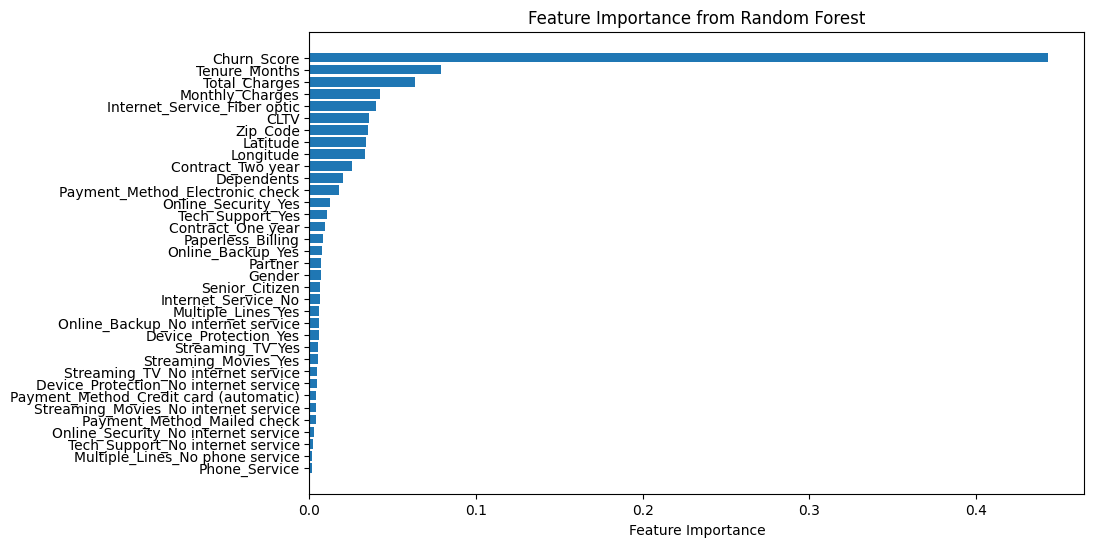

Churn_Score: 0.4430
Tenure_Months: 0.0789
Total_Charges: 0.0636
Monthly_Charges: 0.0425
Internet_Service_Fiber optic: 0.0398
CLTV: 0.0360
Zip_Code: 0.0354
Latitude: 0.0340
Longitude: 0.0336
Contract_Two year: 0.0253
Dependents: 0.0199
Payment_Method_Electronic check: 0.0176
Online_Security_Yes: 0.0121
Tech_Support_Yes: 0.0107
Contract_One year: 0.0096
Paperless_Billing: 0.0080
Online_Backup_Yes: 0.0075
Partner: 0.0071
Gender: 0.0071
Senior_Citizen: 0.0060
Internet_Service_No: 0.0060
Multiple_Lines_Yes: 0.0060
Online_Backup_No internet service: 0.0057
Device_Protection_Yes: 0.0056
Streaming_TV_Yes: 0.0053
Streaming_Movies_Yes: 0.0050
Streaming_TV_No internet service: 0.0046
Device_Protection_No internet service: 0.0043
Payment_Method_Credit card (automatic): 0.0041
Streaming_Movies_No internet service: 0.0037
Payment_Method_Mailed check: 0.0037
Online_Security_No internet service: 0.0028
Tech_Support_No internet service: 0.0023
Multiple_Lines_No phone service: 0.0017
Phone_Service: 0.00

In [3]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


X = preprocessed_df  
y = df['Churn_Value'] 


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)


feature_importances = rf_model.feature_importances_


sorted_idx = np.argsort(feature_importances)[::-1]  
sorted_features = X.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  
plt.show()


for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance:.4f}")


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = np.reshape(X_normalized, (X_normalized.shape[0], X_normalized.shape[1]))
y = np.array(y) 


Starting Episode 1/1
Step 1/7043
Step 2/7043
Step 3/7043
Step 4/7043
Step 5/7043
Step 6/7043
Step 7/7043
Step 8/7043
Step 9/7043
Step 10/7043
Step 11/7043
Step 12/7043
Step 13/7043
Step 14/7043
Step 15/7043
Step 16/7043
Step 17/7043
Step 18/7043
Step 19/7043
Step 20/7043
Step 21/7043
Step 22/7043
Step 23/7043
Step 24/7043
Step 25/7043
Step 26/7043
Step 27/7043
Step 28/7043
Step 29/7043
Step 30/7043
Step 31/7043
Step 32/7043
Step 33/7043
Step 34/7043
Step 35/7043
Step 36/7043
Step 37/7043
Step 38/7043
Step 39/7043
Step 40/7043
Step 41/7043
Step 42/7043
Step 43/7043
Step 44/7043
Step 45/7043
Step 46/7043
Step 47/7043
Step 48/7043
Step 49/7043
Step 50/7043
Step 51/7043
Step 52/7043
Step 53/7043
Step 54/7043
Step 55/7043
Step 56/7043
Step 57/7043
Step 58/7043
Step 59/7043
Step 60/7043
Step 61/7043
Step 62/7043
Step 63/7043
Step 64/7043
Step 65/7043
Step 66/7043
Step 67/7043
Step 68/7043
Step 69/7043
Step 70/7043
Step 71/7043
Step 72/7043
Step 73/7043
Step 74/7043
Step 75/7043
Step 76/7043


KeyboardInterrupt: 

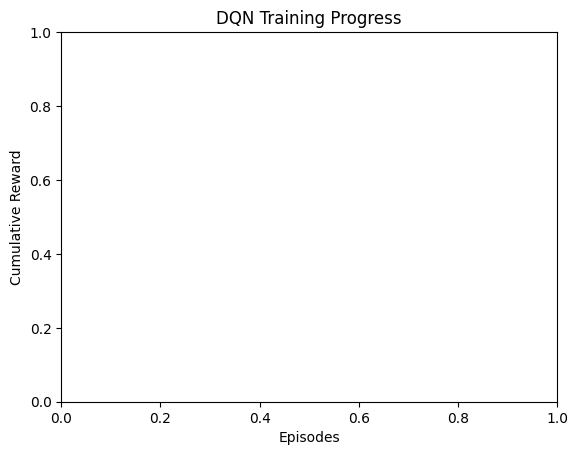

In [5]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import deque

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)  # Experience replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        model = Sequential([
            Dense(64, input_dim=self.state_size, activation='relu'),
            Dense(32, activation='relu'),
            Dense(self.action_size, activation='linear')  # Two actions (retain or not)
        ])
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        """Copy weights from main model to target model."""
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = np.reshape(next_state, [1, self.state_size])
                target = reward + self.gamma * np.amax(self.target_model.predict(next_state)[0])
            target_f = self.model.predict(np.reshape(state, [1, self.state_size]))
            target_f[0][action] = target
            self.model.fit(np.reshape(state, [1, self.state_size]), target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

state_size = X_normalized.shape[1]  # Number of features
action_size = 2  # Two possible actions: retain or not
agent = DQNAgent(state_size, action_size)

num_episodes = 1  # Total episodes
batch_size = 32  # Batch size for replay
rewards_per_episode = []  # Store rewards

plt.ion()  # Enable interactive mode for live plotting
fig, ax = plt.subplots()
ax.set_xlabel("Episodes")
ax.set_ylabel("Cumulative Reward")
ax.set_title("DQN Training Progress")

def update_plot():
    ax.clear()
    ax.plot(rewards_per_episode, label='Reward per Episode')
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Cumulative Reward")
    ax.set_title("DQN Training Progress")
    ax.legend()
    plt.pause(0.1)  # Short pause to update plot

for episode in range(num_episodes):
    print(f"Starting Episode {episode+1}/{num_episodes}")  # Debug print
    total_reward = 0  # Track total reward per episode
    for i in range(len(X_normalized)):
        print(f"Step {i+1}/{len(X_normalized)}")  # Debug print
        state = X_normalized[i]
        state = np.reshape(state, [1, state_size])

        # Select action using epsilon-greedy policy
        if np.random.rand() <= agent.epsilon:
            action = np.random.choice(action_size)  # Random action (exploration)
        else:
            action = np.argmax(agent.model.predict(state))  # Best action (exploitation)

        reward = 1 if (y[i] == 0 and action == 1) else -1
        total_reward += reward  # Accumulate reward

        next_state = X_normalized[i + 1] if i + 1 < len(X_normalized) else np.zeros(state_size)
        next_state = np.reshape(next_state, [1, state_size])

        done = (i == len(X_normalized) - 1)
        agent.remember(state, action, reward, next_state, done)

        if len(agent.memory) > batch_size and i % 100 == 0:
            print("Training step...")  
            agent.replay(batch_size)

        if len(agent.memory) > batch_size and done:
            print("Final training for this episode...")  
            for _ in range(10):  
                agent.replay(batch_size)

    rewards_per_episode.append(total_reward)  # Store reward for plotting
    update_plot()  # Update the graph

    if episode % 10 == 0:
        print("Updating target model...")  # Debug print
        agent.update_target_model()
    
    if episode % 50 == 0:
        agent.model.save(f'dqn_model_episode_{episode}.h5')  # Save model every 50 episodes
    
    print(f"Episode {episode+1}/{num_episodes} - Epsilon: {agent.epsilon:.4f} - Total Reward: {total_reward}")

plt.ioff()  # Disable interactive mode after training
plt.show()  # Display final plot
